In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split # 将数据随机的分为训练数据和测试数据
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve # 画ROC-AUC线的
from sklearn.metrics import auc # 计算ROC-AUC图形面积的
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold # 分层抽样 原始比例是多少分层抽象出来也是多少

sns.set_style(style="darkgrid")
warnings.filterwarnings("ignore")

In [2]:
iris=datasets.load_iris()
X=iris["data"]
y=iris["target"]

In [3]:
cond=y!=2
X=X[cond]
y=y[cond]


In [4]:
# a 是数据
a=np.random.randint(50,size=(8,2))
# b是目标值
b=np.array([0,0,1,0,1,1,0,1])
print(a,b)

[[11  0]
 [ 2 44]
 [24 35]
 [ 2 42]
 [30 44]
 [ 3 20]
 [35 24]
 [21 10]] [0 0 1 0 1 1 0 1]


In [5]:
"""
n_splits=4, random_state=None, shuffle=False
"""
KFold=KFold(n_splits=4)

In [6]:
for train , test in KFold.split(a,b):
    print(train,test)

[2 3 4 5 6 7] [0 1]
[0 1 4 5 6 7] [2 3]
[0 1 2 3 6 7] [4 5]
[0 1 2 3 4 5] [6 7]


In [7]:
sKFold=StratifiedKFold(n_splits=4)

In [8]:
for train , test in sKFold.split(a,b):
    print(train,test)

[1 3 4 5 6 7] [0 2]
[0 2 3 5 6 7] [1 4]
[0 1 2 4 6 7] [3 5]
[0 1 2 3 4 5] [6 7]


In [21]:
sKFold=StratifiedKFold(n_splits=6)

[0.01699906 0.0237287  0.0151745  0.02284188 0.01499823 0.0322661
 0.01599412 0.02083299 0.02185769 0.97733338 0.98267957 0.98133555
 0.98598312 0.98771038 0.98799271 0.98338213 0.91508735]
[0.02576115 0.02047625 0.02436816 0.02264991 0.01221923 0.01381201
 0.01976475 0.01477341 0.01842552 0.98427963 0.98236297 0.97338439
 0.9843803  0.98755215 0.98870313 0.9648621  0.97830413]
[0.04092902 0.01916148 0.04383477 0.02219198 0.00738105 0.05316977
 0.05185645 0.04220876 0.98667366 0.98235397 0.99116065 0.98225157
 0.9847756  0.98050816 0.98964495 0.98764643 0.9817514 ]
[0.03240498 0.02182454 0.01951824 0.02881754 0.03273482 0.03198714
 0.01416232 0.01472615 0.98274661 0.9848777  0.98481954 0.98952076
 0.9615021  0.98224341 0.97704798 0.98196965 0.99179715]
[0.03181384 0.01688836 0.01688251 0.01349806 0.02472811 0.02274446
 0.01526159 0.07061589 0.98787832 0.979084   0.98111015 0.99109997
 0.98020959 0.98768516 0.99037814 0.98674897]
[0.01496876 0.03428973 0.04588721 0.02388391 0.02069971 0

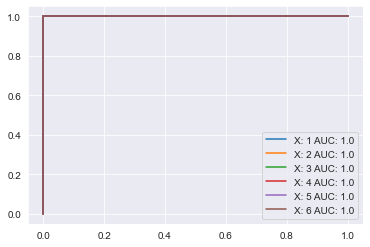

In [23]:
lg=LogisticRegression()
svc=SVC(probability=True)
num=1
# model=lg
model=svc
for train , test in sKFold.split(X,y):
    x_train= X[train]
    y_train=y[train]
    x_test=X[test]
    y_test=y[test]
    model.fit(x_train,y_train)
    prob=model.predict_proba(x_test)[:,1]
    print(prob)
    fpr,tpr,thresholds=roc_curve(y_test,prob)
    auc_=auc(fpr,tpr)
    plt.plot(fpr,tpr,label="X: {} AUC: {}".format(num,auc_.round(3)))
    num+=1
plt.legend()    

In [25]:
X.shape

(100, 4)

In [38]:
X=np.concatenate([X,np.random.randn(100,800)],axis=1)

In [39]:
# 线性插值
from scipy import interp


avg nuc 0.717


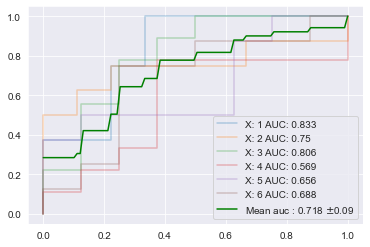

In [52]:
lg=LogisticRegression()
svc=SVC(probability=True)
num=1
aucs=[]
model=lg
fprs=np.linspace(0,1,100)
tprs=[]
# model=svc
for train , test in sKFold.split(X,y):
    x_train= X[train]
    y_train=y[train]
    x_test=X[test]
    y_test=y[test]
    model.fit(x_train,y_train)
    prob=model.predict_proba(x_test)[:,1]
#     print(prob)
    fpr,tpr,thresholds=roc_curve(y_test,prob)
    # 对tpr 进行线性插值
    tprs.append(interp(fprs,fpr,tpr))
#     fprs.append(fpr)
#     tprs.append(tpr)
    
    auc_=auc(fpr,tpr)
    aucs.append(auc_)
    plt.plot(fpr,tpr,alpha=0.3,label="X: {} AUC: {}".format(num,auc_.round(3)))
    num+=1
# tprs 中6个数据 求平均值
tprs=np.mean(tprs,axis=0)

auc_mean=auc(fprs,tprs)
std_auc=np.std(aucs).round(3)
plt.plot(fprs,tprs,label=f"Mean auc : {auc_mean.round(3)} $\pm${std_auc}",c="green")
print(f"avg nuc {np.mean(aucs).round(3)}")
plt.legend()    

In [43]:
np.mean(tprs,axis=1)

array([0.835     , 0.7525    , 0.80333333, 0.56888889, 0.6575    ,
       0.6875    ])

In [36]:
np.array(tprs)

array([array([0.   , 0.125, 0.875, 0.875, 1.   , 1.   ]),
       array([0.   , 0.125, 0.375, 0.375, 0.75 , 0.75 , 0.875, 0.875, 1.   ,
              1.   ])                                                       ,
       array([0.        , 0.11111111, 0.55555556, 0.55555556, 0.66666667,
              0.66666667, 0.88888889, 0.88888889, 1.        , 1.        ]),
       array([0.        , 0.11111111, 0.11111111, 0.22222222, 0.22222222,
              0.66666667, 0.66666667, 0.77777778, 0.77777778, 1.        ,
              1.        ])                                               ,
       array([0.   , 0.125, 0.875, 0.875, 1.   , 1.   ]),
       array([0.   , 0.125, 0.25 , 0.25 , 0.375, 0.375, 0.75 , 0.75 , 0.875,
              0.875, 1.   , 1.   ])                                         ],
      dtype=object)

In [55]:
fprs.size

100

avg nuc 0.481


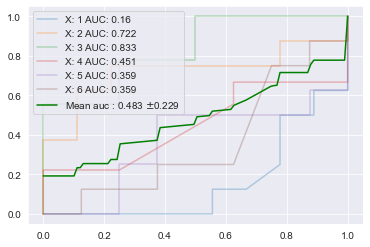

In [53]:
lg=LogisticRegression()
svc=SVC(probability=True)
num=1
aucs=[]
# model=lg
model=svc

fprs=np.linspace(0,1,100)
tprs=[]
for train , test in sKFold.split(X,y):
    x_train= X[train]
    y_train=y[train]
    x_test=X[test]
    y_test=y[test]
    model.fit(x_train,y_train)
    prob=model.predict_proba(x_test)[:,1]
#     print(prob)
    fpr,tpr,thresholds=roc_curve(y_test,prob)
    # 对tpr 进行线性插值
    tprs.append(interp(fprs,fpr,tpr))
#     fprs.append(fpr)
#     tprs.append(tpr)
    
    auc_=auc(fpr,tpr)
    aucs.append(auc_)
    plt.plot(fpr,tpr,alpha=0.3,label="X: {} AUC: {}".format(num,auc_.round(3)))
    num+=1
# tprs 中6个数据 求平均值
tprs=np.mean(tprs,axis=0)

auc_mean=auc(fprs,tprs)
std_auc=np.std(aucs).round(3)
plt.plot(fprs,tprs,label=f"Mean auc : {auc_mean.round(3)} $\pm${std_auc}",c="green")
print(f"avg nuc {np.mean(aucs).round(3)}")
plt.legend()    